# Comparing different sets of hyperparameters of softmax loss


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import monitor_utils
import softmax_monitor_simple
from glob import glob
from jupyterthemes import jtplot
jtplot.style(theme='oceans16')

def txt_read(filename, cols, smooth=False):
        txt_data = np.loadtxt(filename, delimiter=',', usecols=cols)

        data1_raw = txt_data[:, 1]
        data2_raw = txt_data[:, 2]
        
        data1_mov = data1_raw
        data2_mov = data2_raw
        
        return txt_data[:, 0], data1_mov, data2_mov
    
def moving_avg(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)

## Loss and accuracy on train and validation dataset

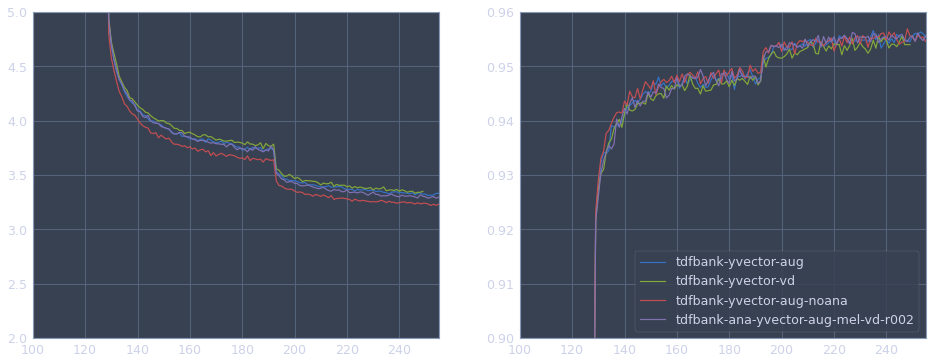

In [279]:
exp_groups = []

exp_folders = glob("/home/ge/lfb-sv/experiments/*")
exp_names = []

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for i, folder in enumerate(exp_folders):
    exp_name = folder.split('/')[-1]
#     if ('tcn' in exp_name or 'mel' in exp_name):
#     if ('sinc-yvector-aug' in exp_name or 'sinc-ana-yvector' in exp_name):
    if 'tdfbank-ana-' in exp_name or 'tdfbank-yvector-' in exp_name:

        exp_name = folder.split('/')[-1]
        exp_groups.append(exp_name)
        
        exp_loss_val = os.path.join(folder, 'val_loss.txt')
        
        _, val_loss, val_acc = txt_read(exp_loss_val, [0, 1, 2])
        
        axes[0].plot(val_loss)
        axes[1].plot(val_acc)
        exp_names.append(exp_name)

# axes[0].legend(exp_names)
axes[1].legend(exp_names)

# axes[0].set_xlim([0, 60])
# axes[1].set_xlim([0, 60])
axes[0].set_ylim([2, 5])
axes[1].set_ylim([0.90, 0.96])

axes[0].set_xlim([100, 255])
axes[1].set_xlim([100, 255])
# axes[0].set_ylim([2, 4])
# axes[1].set_ylim([0.9, 0.98])

plt.show()
plt.close()


In [ ]:
# exp_groups = []

# exp_folders = glob("/home/ge/lfb-sv/experiments/*")
# exp_names = []

# fig, axes = plt.subplots(2, 2, figsize=(16, 10))
# for i, folder in enumerate(exp_folders):
#     exp_name = folder.split('/')[-1]
#     if 'xvector' in exp_name:
# #     if ('yvector' in exp_name and 'dcd' not in exp_name) or 'leaf' in folder:
#         exp_groups.append(exp_name)
        
#         exp_loss_val = os.path.join(folder, 'val_loss.txt')
#         exp_loss_train = os.path.join(folder, 'train_loss.txt')
        
#         _, train_loss, train_acc = txt_read(exp_loss_train, [0, 1, 2])
#         _, val_loss, val_acc = txt_read(exp_loss_val, [0, 1, 2])
        
#         axes[1, 0].plot(moving_avg(train_loss, 500))
#         axes[1, 1].plot(moving_avg(train_acc, 500))
        
#         axes[0, 0].plot(val_loss)
#         axes[0, 1].plot(val_acc)
#         exp_names.append(exp_name)

# axes[0, 0].legend(exp_names)
# axes[0, 1].legend(exp_names)
# axes[1, 0].legend(exp_names)
# axes[1, 1].legend(exp_names)

# axes[0, 0].set_xlim([0, 120])
# axes[0, 1].set_xlim([0, 120])
# axes[1, 0].set_xlim([0, 120000])
# axes[1, 1].set_xlim([0, 120000])
# # axes[0, 0].set_ylim([2, 6])
# # axes[0, 1].set_ylim([0.9, 0.99])
# # axes[1, 0].set_ylim([2, 6])
# # axes[1, 1].set_ylim([0.9, 0.99])

# # axes[0, 0].set_xlim([120, 360])
# # axes[0, 1].set_xlim([120, 360])
# # axes[1, 0].set_xlim([120000, 360000])
# # axes[1, 1].set_xlim([120000, 360000])
# # axes[0, 0].set_ylim([2, 4])
# # axes[0, 1].set_ylim([0.95, 0.99])
# # axes[1, 0].set_ylim([2, 4])
# # axes[1, 1].set_ylim([0.95, 0.99])

# plt.show()
# plt.close()
